# 1. Testing if two graphs are isomorphic

Returns True if the graphs G1 and G2 are isomorphic and False otherwise

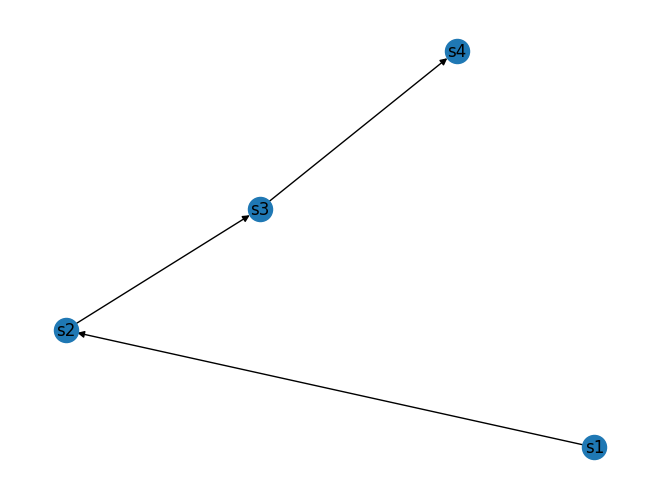

In [6]:
import networkx as nx

G1, G2 = nx.DiGraph(), nx.DiGraph()
G1.add_edges_from([("s1", "s2"), ("s2", "s3"), ("s3", "s4")]) # G1: 1->2->3->4
G2.add_edges_from([("s1", "s2"), ("s2", "s3"), ("s3", "s7")]) # G2: 1->2->3->7

nx.draw(G1, with_labels = True)


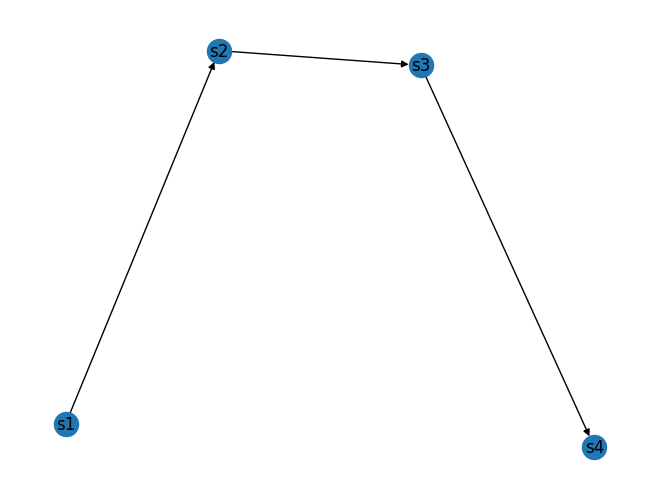

In [7]:
nx.draw(G1, with_labels = True)

In [8]:
nx.is_isomorphic(G1, G2)

True

## 1.1. Uses the VF2 Algorithm (An implementation of VF2 algorithm for graph ismorphism testing)



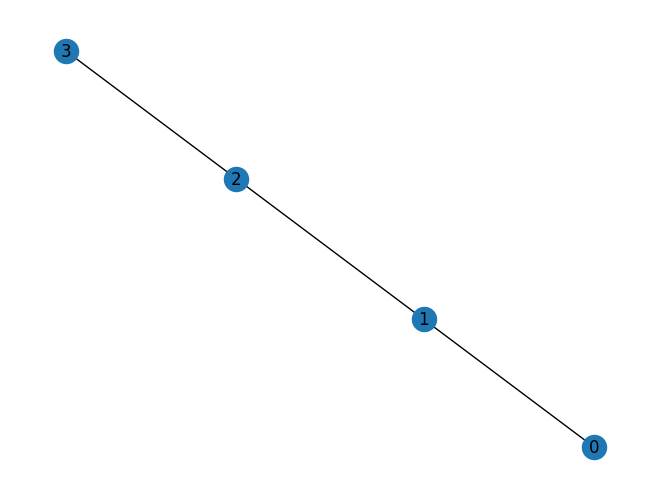

In [9]:
#Create graph G1 and G2
from networkx.algorithms import isomorphism
G1 = nx.path_graph(4)
G2 = nx.path_graph(4)

nx.draw(G1, with_labels = True)

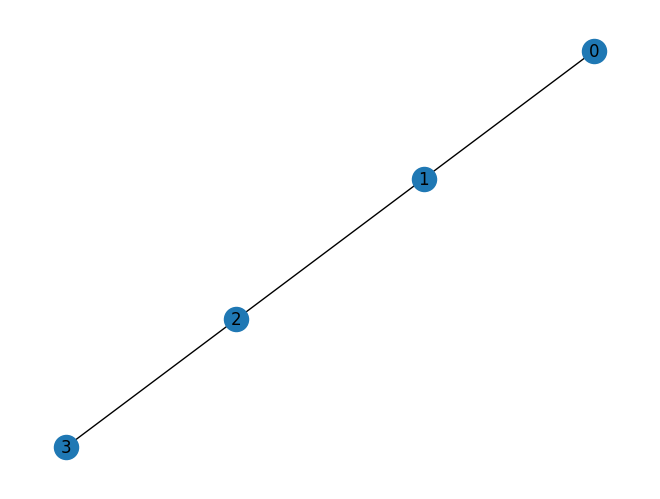

In [10]:
nx.draw(G2, with_labels = True)

In [11]:
GM = isomorphism.GraphMatcher(G1,G2)
GM.is_isomorphic()

True

In [12]:
GM.mapping

{0: 0, 1: 1, 2: 2, 3: 3}

## 1.2. Suppose G1 and G2 are isomorphic directed graphs. Verification is as follows:

In [13]:
G1 = nx.path_graph(4, create_using=nx.DiGraph())
G2 = nx.path_graph(4, create_using=nx.DiGraph())
DiGM = isomorphism.DiGraphMatcher(G1,G2)
DiGM.is_isomorphic()

True

### DiGM.mapping stores the isomorphism mapping from G1 to G2


In [14]:
DiGM.mapping

{0: 0, 1: 1, 2: 2, 3: 3}

## 1.3. Label attributes comparision: During comparison, node attributes are compared

By default, node attributes are a blank dictionary (and do not incorporate node label information)

A quick way to fix that is to use nx.convert_node_labels_to_integers and specify the key for label attributes:

In [15]:
'''
convert_node_labels_to_integers function is used to relabel the nodes of the graph with consecutive integers
'''
G1_int = nx.convert_node_labels_to_integers(G1, label_attribute='label')
G2_int = nx.convert_node_labels_to_integers(G2, label_attribute='label')
print(G1_int.nodes[0])

{'label': 0}


In [16]:
nx.is_isomorphic(G1_int, G2_int, node_match = lambda x,y: x==y)

True

## 1.4. Search for a subgraph of G2 that is isomorphic to G1. (Finding multiple subgraphs)

In [17]:
import networkx.algorithms.isomorphism as iso

G1 = nx.Graph()
G1.add_edges_from([(1,2)])

G2 = nx.Graph()
G2.add_edges_from([(1,2), (2,3), (3,4)])

# Search for a subgraph of G2 that is isomorphic to G1
GM = iso.GraphMatcher(G2,G1)
for mapping in GM.subgraph_isomorphisms_iter():
    print(mapping)


{1: 1, 2: 2}
{2: 1, 1: 2}
{2: 1, 3: 2}
{3: 1, 2: 2}
{3: 1, 4: 2}
{4: 1, 3: 2}


## 1.5. Using GraphMatcher to find a subgraph in Karate network

Modify the GraphMatcher class so that subgraph_is_isomorphic() will determine whether G2 is a subgraph (with
an identity isomorphism).

In [18]:
class GraphMatcher(nx.algorithms.isomorphism.GraphMatcher):
    def semantic_feasibility(self, G1_node, G2_node):
        return G1_node == G2_node

In [19]:
G = nx.karate_club_graph()

# Grab a subgraph
subG_good = G.subgraph(range(10))

    
# Make an isomorphic subgraph
subG_bad = nx.relabel_nodes(subG_good, dict(zip(range(10), 'abcdefghij')))

gm = GraphMatcher(G,subG_good)
gm.subgraph_is_isomorphic()


True

In [20]:
gm = GraphMatcher(G,subG_bad)
gm.subgraph_is_isomorphic()


False

# 2. gSpan method

In [21]:
!pip install gspan-mining
from gspan_mining.config import parser
from gspan_mining.main import main

Defaulting to user installation because normal site-packages is not writeable


In [22]:
%matplotlib inline

In [ ]:
#ATTENTION: DUE TO PANDAS 2.0 UPDATE, APPEND WAS REMOVED, WE NEED TO CHANGE APPEND TO CONCAT IN gspan.py IN THE LIBRARY gsapn-mining
self._report_df = self._report_df.append(
            pd.DataFrame(
                {
                    'support': [self._support],
                    'description': [display_str],
                    'num_vert': self._DFScode.get_num_vertices()
                },
                index=[int(repr(self._counter)[6:-1])]
            )
        )
        
#REMOVE CODE ABOVE AND ADD CODE BELOW
self._report_df = pd.concat(
            [
            self._report_df,
            pd.DataFrame(
                {
                'support': [self._support],
                'description': [display_str],
                'num_vert': self._DFScode.get_num_vertices()
                },
                index=[int(repr(self._counter)[6:-1])]
            )
            ]
        )
        

## 2.1. Fiding a subgraph with min support (-s 2) and minimal of nodes in the subgraph (-l 3)

Read graph data from ./graphdata/sample_data4, mine undirected subgraphs given min support


Data File Format: gSpan/graphdata/

"t # N" means the Nth graph,

"v M L" means that the Mth vertex in this graph has label L,

"e P Q L" means that there is an edge connecting the Pth vertex with the Qth vertex. The edge has label L



In [23]:
args_str = '-s 2 -l 3 -p True ./graphdata/sample_data4'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

## 2.2. Getting all the subgraph with minimal support

t # 0
v 0 A
v 1 B
v 2 C
e 0 1 1
e 1 2 1

Support: 3


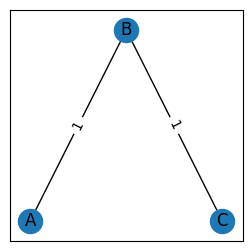


-----------------

t # 1
v 0 A
v 1 B
v 2 C
e 0 1 1
e 0 2 1
e 1 2 1

Support: 2


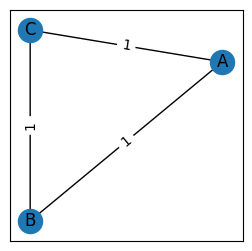


-----------------

t # 2
v 0 A
v 1 B
v 2 C
v 3 A
e 0 1 1
e 1 2 1
e 2 3 1

Support: 2


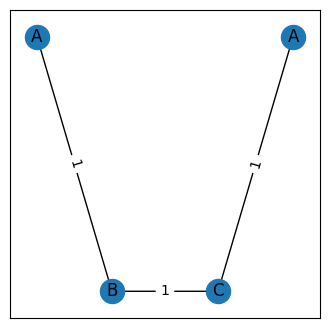


-----------------

t # 3
v 0 A
v 1 B
v 2 A
e 0 1 1
e 1 2 1

Support: 3


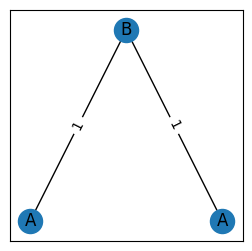


-----------------

t # 4
v 0 A
v 1 B
v 2 A
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1

Support: 3


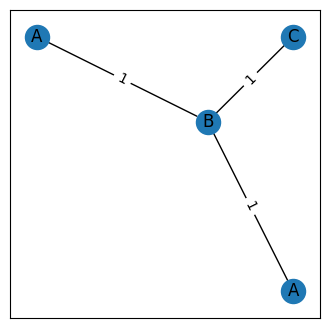


-----------------

t # 5
v 0 A
v 1 B
v 2 A
v 3 C
e 0 1 1
e 1 2 1
e 2 3 1

Support: 2


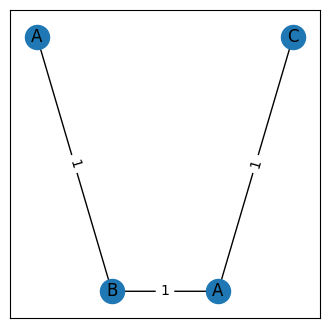


-----------------

t # 6
v 0 A
v 1 B
v 2 A
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1
e 2 3 1

Support: 2


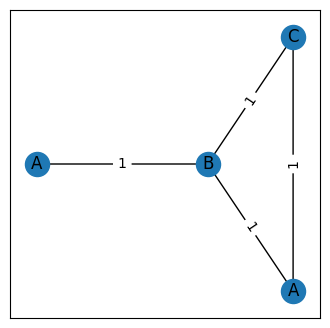


-----------------

t # 7
v 0 A
v 1 B
v 2 C
e 0 1 1
e 0 2 1

Support: 2


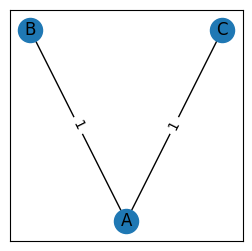


-----------------

t # 8
v 0 A
v 1 A
v 2 B
e 0 1 1
e 1 2 1

Support: 3


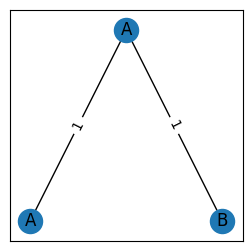


-----------------

t # 9
v 0 A
v 1 A
v 2 B
e 0 1 1
e 0 2 1
e 1 2 1

Support: 3


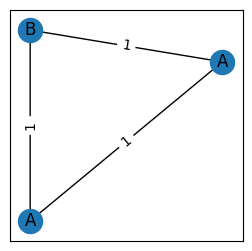


-----------------

t # 10
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 2 1
e 1 2 1
e 2 3 1

Support: 3


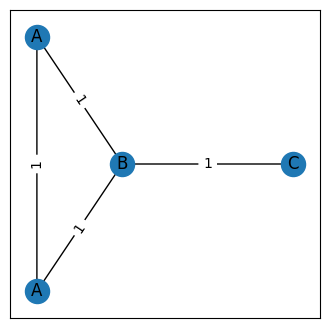


-----------------

t # 11
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 2 1
e 0 3 1
e 1 2 1
e 2 3 1

Support: 2


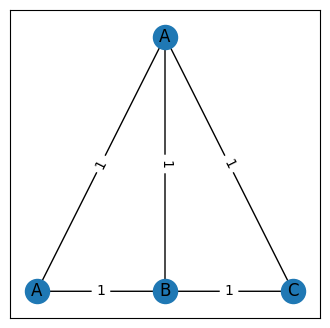


-----------------

t # 12
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 2 1
e 1 2 1
e 1 3 1

Support: 2


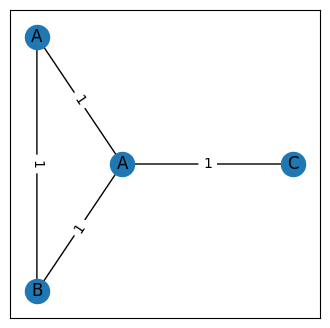


-----------------

t # 13
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 1 2 1
e 2 3 1

Support: 3


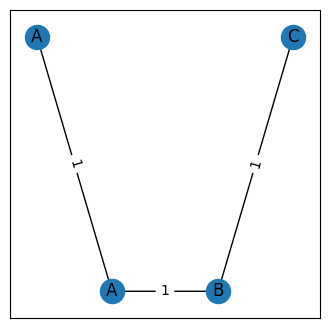


-----------------

t # 14
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 3 1
e 1 2 1
e 2 3 1

Support: 2


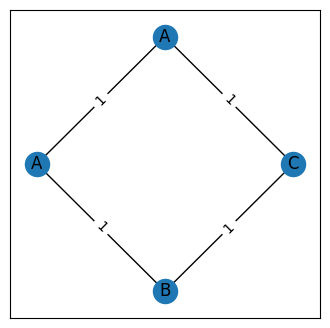


-----------------

t # 15
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1
e 2 3 1

Support: 2


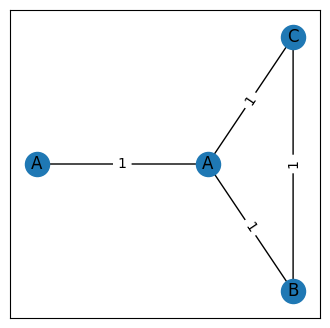


-----------------

t # 16
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1

Support: 2


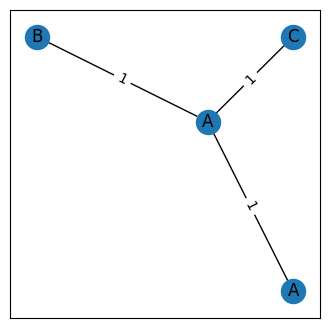


-----------------

t # 17
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 3 1
e 1 2 1

Support: 2


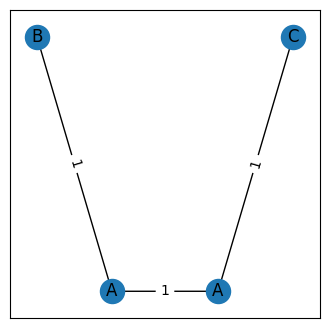


-----------------

t # 18
v 0 A
v 1 A
v 2 C
e 0 1 1
e 1 2 1

Support: 2


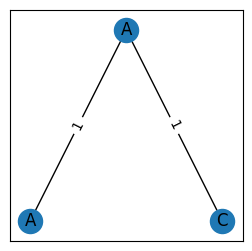


-----------------

t # 19
v 0 A
v 1 A
v 2 C
v 3 B
e 0 1 1
e 1 2 1
e 2 3 1

Support: 2


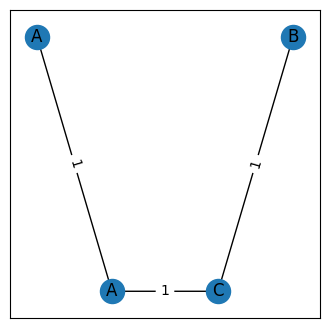


-----------------

t # 20
v 0 A
v 1 C
v 2 B
e 0 1 1
e 1 2 1

Support: 2


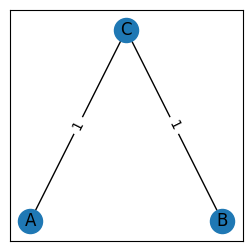


-----------------

Read:	0.0 s
Mine:	1.44 s
Total:	1.44 s


In [24]:
gs = main(FLAGS)
print(gs)

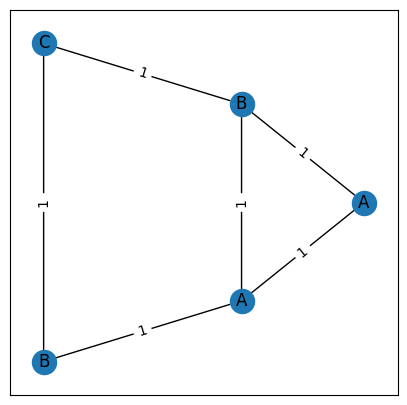

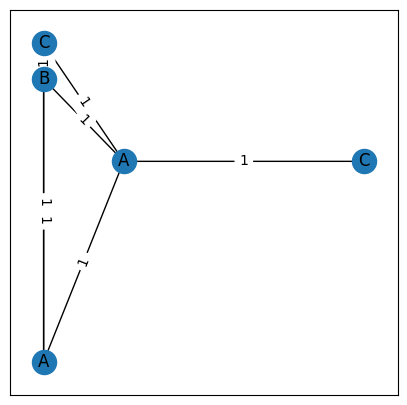

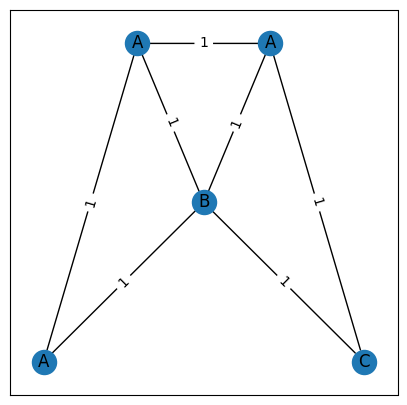

In [25]:
for g in gs.graphs.values():
    g.plot()

## 3. Apriori-based FSG Algorithm

In [8]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Define the list of transactions (subgraphs)
transactions = [
    ['A', 'B', 'C'],
    ['B', 'C', 'D'],
    ['A', 'C', 'D'],
    ['B', 'D'],
    ['A', 'C'],
    ['B', 'C'],
    ['A', 'B', 'D']
]

# Initialize the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the encoded transactions to a DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the apriori-based FPGrowth algorithm
frequent_subgraphs = fpgrowth(df, min_support=0.3, use_colnames=True)

# Print the frequent subgraphs
print(frequent_subgraphs)


    support itemsets
0  0.714286      (C)
1  0.714286      (B)
2  0.571429      (A)
3  0.571429      (D)
4  0.428571   (C, B)
5  0.428571   (A, C)
6  0.428571   (D, B)
